#### Answers submitted by:  [fill in your name here]  
#### Date:  [fill in date completed]  
---

# Python Part 3:  Pandas Exercises
---

## Q1:  Read in the libraries you need

In [3]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [63]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Q2:  Set options in pandas so it displays `max_rows` to 10

In [5]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

## Q3:  What versions of `Python` and `pandas` are you running?  



In [6]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.14.1
Numpy version: 1.9.0


In [7]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 2.7.13 |Anaconda custom (x86_64)| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


## Q4:  Read in the "olive" dataset that is available in this folder
Description:  572 olive oil samples from 3 different regions (and 9 sub-regions) of Italy; for each sample the normalized concentrations of 8 fatty acids are given.  
Source:  http://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/

There are 3 regions: 
* South
* North
* Sardinia

There are 9 sub-regions (areas): 
* North Apulia
* South Apulia
* Calabria
* Sicily
* Inland
* Coastal Sardinia
* Umbria
* East
* West Liguria

Supplemental report:  http://www.public.iastate.edu/~dicook/stat503/05/cs-olive.pdf

In [8]:
# read csv data into pandas dataframe
df = pd.read_csv('olive.csv')

## Q5:  How many rows and columns are in this dataframe?

In [9]:
 df.shape

(572, 11)

## Q6:  Print the first 4 rows of the data

In [11]:
df.head(4)

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35


## Q7:  How many different data types are in this dataframe, and what are the data types?

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 571
Data columns (total 11 columns):
Unnamed: 0     572 non-null object
region         572 non-null int64
area           572 non-null int64
palmitic       572 non-null int64
palmitoleic    572 non-null int64
stearic        572 non-null int64
oleic          572 non-null int64
linoleic       572 non-null int64
linolenic      572 non-null int64
arachidic      572 non-null int64
eicosenoic     572 non-null int64
dtypes: int64(10), object(1)

## Q8:  Create a new column
### Copy the column to:  'Unnamed: 0' to 'sub_region_raw'

In [21]:
df['sub_region_raw'] = df['Unnamed: 0']

## Q9:  Rename a column
### 'Unnamed: 0' to:  'sub_region_desc'

In [34]:
df = df.rename(columns = {'Unnamed: 0': 'sub_region_desc'})

## Q10:  Rename the column 'area' to:  'sub_region'

In [35]:
 df = df.rename(columns = {'area' : 'sub_region'})

## Q11:  How many unique values of 'region' are there?

Hint:  the answer should be 3

In [25]:
df['region'].unique()

array([1, 2, 3])

## Q12:  How many unique values of 'sub_region' are there?

Hint:  the answer should be 9

In [38]:
print(max(df['sub_region'].unique()))

9


## Q13:  How many unique values of 'sub_region_desc' are there?
Hint:  we would like the answer to be 9, but here's where we run into some messy data

In [39]:
 df['sub_region_desc'].unique()

array(['1.North-Apulia', '2.North-Apulia', '3.North-Apulia',
       '4.North-Apulia', '5.North-Apulia', '6.North-Apulia',
       '7.North-Apulia', '8.North-Apulia', '9.North-Apulia',
       '10.North-Apulia', '11.North-Apulia', '12.North-Apulia',
       '13.North-Apulia', '14.North-Apulia', '15.North-Apulia',
       '16.North-Apulia', '17.North-Apulia', '18.North-Apulia',
       '19.North-Apulia', '20.North-Apulia', '21.North-Apulia',
       '22.North-Apulia', '23.North-Apulia', '24.North-Apulia',
       '25.North-Apulia', '26.Calabria', '27.Calabria', '28.Calabria',
       '29.Calabria', '30.Calabria', '31.Calabria', '32.Calabria',
       '33.Calabria', '34.Calabria', '35.Calabria', '36.Calabria',
       '37.Calabria', '38.Calabria', '39.Calabria', '40.Calabria',
       '41.Calabria', '42.Calabria', '43.Calabria', '44.Calabria',
       '45.Calabria', '46.Calabria', '47.Calabria', '48.Calabria',
       '49.Calabria', '50.Calabria', '51.Calabria', '52.Calabria',
       '53.Calabria', '5

## Q14:  Looks like 'sub_region_desc' has line numbers attached to the beginning of region name.  We need to do some data cleaning.  Can you remove them?  
```
 	region 	sub_region 	palmitic 	palmitoleic 	stearic 	oleic 	linoleic 	linolenic 	arachidic 	eicosenoic 	sub_region_raw
sub_region_desc 											
1.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
10.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
100.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
101.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
102.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
```

Hint:  check out this link
http://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string
 

In [41]:
 df.sub_region_desc = df.sub_region_desc.str.replace(r'[\d]+', '')

In [43]:
#df.head()
df.sub_region_desc.head(3)

0    .North-Apulia
1    .North-Apulia
2    .North-Apulia
Name: sub_region_desc, dtype: object

In [46]:
 df.sub_region_desc = df.sub_region_desc.str.replace(r'[\.]+', '')

In [47]:
#df.head()
df.sub_region_desc.head(3)

0    North-Apulia
1    North-Apulia
2    North-Apulia
Name: sub_region_desc, dtype: object

In [9]:
#df.head()

## Q15:  Try again:  How many unique values of 'sub_region_desc' are there?
Hint:  you should see 9 of them!

In [48]:
len(df['sub_region_desc'].unique())

9

## Q16:   Create a horizontal frequency barplot for 'region'

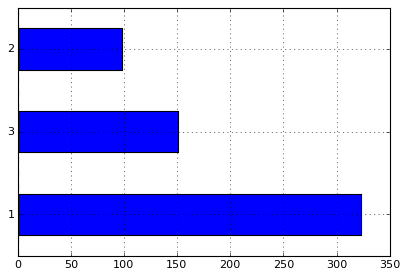

In [76]:
df['region'].value_counts().plot(kind = 'barh')

## Q17:   Create a horizontal frequency barplot for 'sub_region'

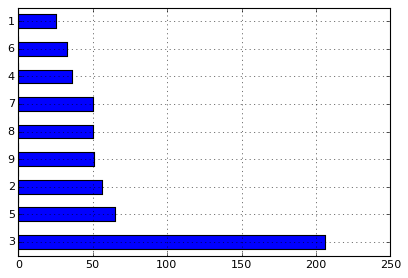

In [79]:
 df['sub_region'].value_counts().plot(kind = 'barh')


## Q18:   Create a horizontal frequency barplot for 'sub_region_desc'

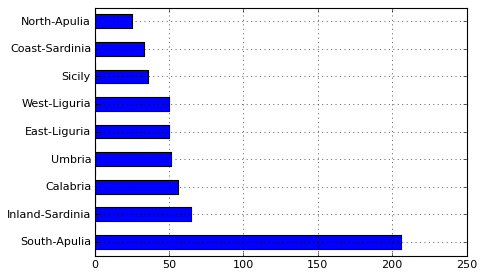

In [80]:
df['sub_region_desc'].value_counts().plot(kind = 'barh')